In [1]:
import scipy.io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(42)


# Pegando os dados
mat1 = scipy.io.loadmat('dados_treinamento.mat')
mat2 = scipy.io.loadmat('dados_val.mat')
mat3 = scipy.io.loadmat('dados_teste.mat')
# Dados Treinamento
data = pd.DataFrame(np.hstack((mat1['X'], mat1['y'])))
# Dados Validação
data_val = pd.DataFrame(np.hstack((mat2['Xval'], mat2['yval'])))
# Dados Teste
data_test = pd.DataFrame(np.hstack((mat3['Xt'], mat3['yt'])))

In [2]:
data_val.head()

,0,1,2
0,0.652323,0.000000,1.0
1,1.295864,0.652323,1.0
2,1.009342,1.295864,1.0
3,1.048616,1.009342,-1.0
4,-1.178718,1.048616,-1.0


In [3]:
data_class_1 = data.loc[data[2] == 1] # Dataframe dos padrões da classe 1
data_class_0 = data.loc[data[2] == -1] # Dataframe dos padrões da classe -1
print('Shape:',data.shape)
data.head()

Shape: (1000, 3)


,0,1,2
0,0.595256,0.000000,1.0
1,1.006073,0.595256,1.0
2,0.483975,1.006073,-1.0
3,-0.394707,0.483975,1.0
4,1.166833,-0.394707,1.0


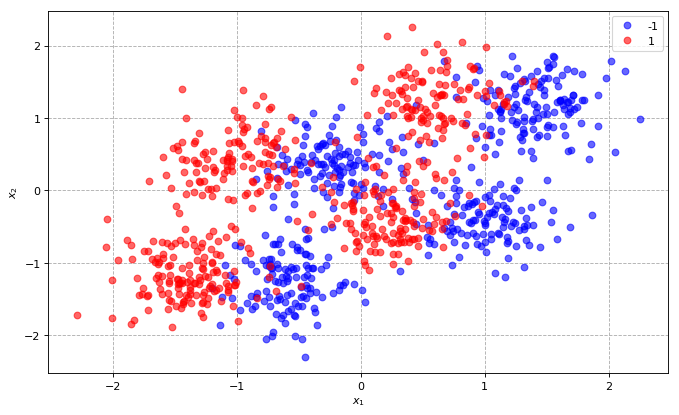

In [4]:
plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
#plt.plot(data[0], data[1], 'o', alpha=.6)
plt.plot(data_class_1[0], data_class_1[1], 'bo', alpha=.6)
plt.plot(data_class_0[0], data_class_0[1], 'ro', alpha=.6)
plt.legend((-1,1))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid(True, linestyle='--', linewidth=0.8)
plt.show()

In [5]:
data_train_labels = data[2]
data_train = data.drop(2, axis=1)

data_val_labels = data_val[2]
data_val = data_val.drop(2, axis=1)

data_test_labels = data_test[2]
data_test = data_test.drop(2, axis=1)
print('Shape dados treinamento:', data_train.shape)
print('Shape dados validação:', data_val.shape)
print('Shape dados teste:', data_test.shape)
print('\nTreinamento\n',data_train.head())
print('\nValidação\n',data_val.head())
print('\nTeste\n', data_test.head())

Shape dados treinamento: (1000, 2)
Shape dados validação: (1000, 2)
Shape dados teste: (1000, 2)

Treinamento
           0         1
0  0.595256  0.000000
1  1.006073  0.595256
2  0.483975  1.006073
3 -0.394707  0.483975
4  1.166833 -0.394707

Validação
           0         1
0  0.652323  0.000000
1  1.295864  0.652323
2  1.009342  1.295864
3  1.048616  1.009342
4 -1.178718  1.048616

Teste
           0         1
0  0.276028  0.000000
1  1.032082  0.276028
2  0.868371  1.032082
3 -0.998403  0.868371
4 -1.583893 -0.998403


C:\Users\Samuel\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


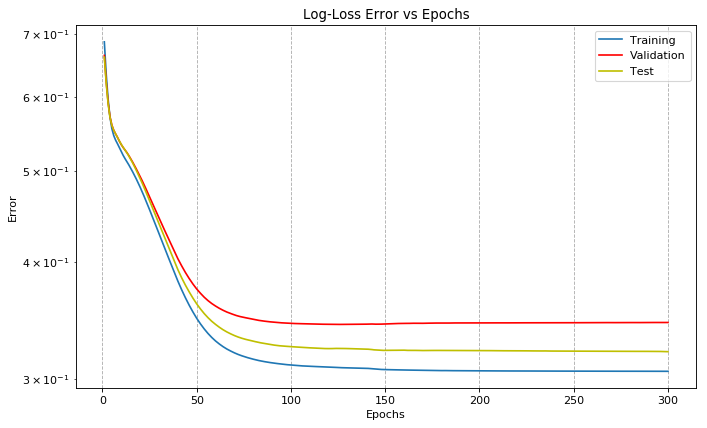

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss

classifier = MLPClassifier(learning_rate_init=0.01, solver="adam", activation="relu", max_iter=1, 
                           verbose=False, random_state=42, warm_start=True)
classifier.hidden_layer_sizes = (15,)
epochs = 300

errors_train = []
errors_val = []
errors_test = []


for i in range(epochs):


    errors_train.append(classifier.fit(data_train, data_train_labels).loss_)
    
    y_val_predict = classifier.predict_proba(data_val)
    errors_val.append(log_loss(data_val_labels, y_val_predict))
    
    y_test_predict = classifier.predict_proba(data_test)
    errors_test.append(log_loss(data_test_labels, y_test_predict))
    
    
plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')    
plt.semilogy(range(1, epochs + 1), errors_train, '-')
plt.semilogy(range(1, epochs + 1), errors_val, '-r')
plt.semilogy(range(1, epochs + 1), errors_test, '-y')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend(('Training', 'Validation', 'Test'))
plt.grid(True, linestyle='--', linewidth=0.8)
plt.title('Log-Loss Error vs Epochs')
plt.show()


In [7]:
# def plot_decision_boundary(classifier, X, y, title):
#     xmin, xmax = np.min(X[:, 0]) - 0.05, np.max(X[:, 0]) + 0.05
#     ymin, ymax = np.min(X[:, 1]) - 0.05, np.max(X[:, 1]) + 0.05
#     step = 0.1
#     #cm = plt.cm.coolwarm_r
#     cm = plt.cm.RdBu
#     thr = 0.0
#     xx, yy = np.meshgrid(np.arange(xmin - thr, xmax + thr, step), np.arange(ymin - thr, ymax + thr, step))
#     if hasattr(classifier, 'decision_function'):
#         Z = classifier.decision_function(np.hstack((xx.ravel()[:, np.newaxis], yy.ravel()[:, np.newaxis])))
#     else:
#         Z = classifier.predict_proba(np.hstack((xx.ravel()[:, np.newaxis], yy.ravel()[:, np.newaxis])))[:, 1]
#     Z = Z.reshape(xx.shape)
#     plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k') 
#     plt.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
#     #plt.colorbar()
#     plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.6)
#     plt.xlim(xmin, xmax)
#     plt.ylim(ymin, ymax)
#     plt.xticks((0.0, 1.0))
#     plt.yticks((0.0, 1.0))
#     plt.title(title)


In [8]:
# plot_decision_boundary(classifier, data_train.values, data_train_labels.values, 'TESTE')

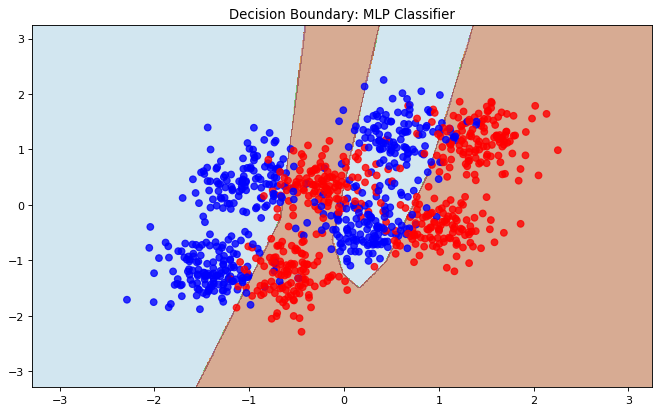

In [9]:
X = data_train.values
y = data_train_labels.values
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k') 
colormap = plt.cm.Paired
plt.contourf(xx, yy, Z, alpha=0.5, cmap=colormap)
color_map_samples = {-1: (0, 0, 1), 1: (1, 0, 0)}
colors = [color_map_samples[c] for c in y]
plt.scatter(X[:, 0], X[:, 1], c=colors, alpha=0.8)
plt.title('Decision Boundary: MLP Classifier')
plt.show()

In [10]:
predictions = pd.DataFrame(classifier.predict(data_test))
predictions.columns = ['Predicted']
predictions['Real'] = data_test_labels.values

# Error (1 - Acc)
#error_test = 1 - classifier.score(data_test, data_test_labels)

print('Accuracy:',classifier.score(data_test, data_test_labels))
print('Error:', 1 - classifier.score(data_test, data_test_labels))
predictions.head(10)


Accuracy: 0.869
Error: 0.131


,Predicted,Real
0,-1.0,1.0
1,1.0,1.0
2,-1.0,-1.0
3,-1.0,-1.0
4,-1.0,-1.0
5,1.0,1.0
6,1.0,1.0
7,1.0,-1.0
8,1.0,1.0
9,-1.0,-1.0


training: 10 Hidden Neurons


C:\Users\Samuel\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


training: 50 Hidden Neurons


C:\Users\Samuel\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


training: 100 Hidden Neurons


C:\Users\Samuel\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


training: 300 Hidden Neurons


C:\Users\Samuel\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


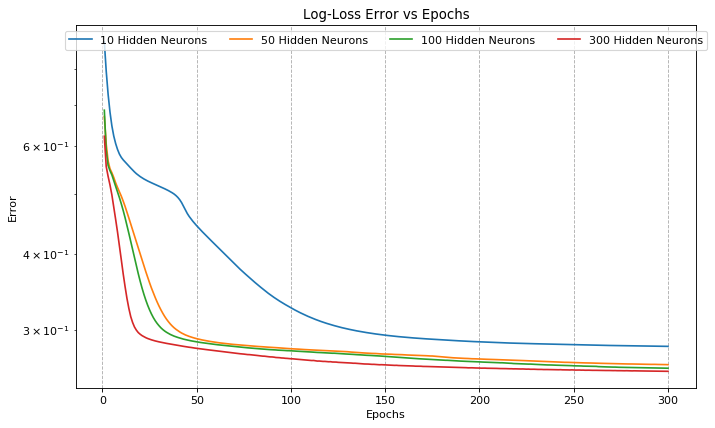

In [11]:
params = [{'hidden_layer_sizes': 10},
          {'hidden_layer_sizes': 50},
          {'hidden_layer_sizes': 100},
          {'hidden_layer_sizes': 300},]

labels = ["10 Hidden Neurons", "50 Hidden Neurons",
         "100 Hidden Neurons", "300 Hidden Neurons"]

plot_args = [{'c': 'red', 'linestyle': '-'},
            {'c': 'green', 'linestyle': '-'},
            {'c': 'blue', 'linestyle': '-'},
            {'c': 'red', 'linestyle': '--'}]

classifier = MLPClassifier(learning_rate_init=0.01, solver="adam", activation="relu", max_iter=1, 
                           verbose=False, random_state=42, warm_start=True)

plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')    
for label, param in zip(labels, params):
    print("training: %s" % label)
    mlp = MLPClassifier(learning_rate_init=0.01, solver="adam", activation="relu", max_iter=1, 
                           verbose=False, random_state=42, warm_start=True, **param)
    epochs = 300

    errors_train = []
    errors_val = []
    errors_test = []

    
    for i in range(epochs):


        errors_train.append(mlp.fit(data_train, data_train_labels).loss_)
    
        y_val_predict = mlp.predict_proba(data_val)
        errors_val.append(log_loss(data_val_labels, y_val_predict))
    
        y_test_predict = mlp.predict_proba(data_test)
        errors_test.append(log_loss(data_test_labels, y_test_predict))
        
    
    plt.semilogy(range(1, epochs + 1), errors_train, '-')
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    
    plt.grid(True, linestyle='--', linewidth=0.8)
    plt.title('Log-Loss Error vs Epochs')
    #plt.show()
    #print(errors_train)
plt.legend(labels, ncol=5, loc="upper center")
# def plot_on_dataset(X, y, ax, name):
#     # for each dataset, plot learning for each learning strategy
#     print("\nlearning on dataset %s" % name)
#     ax.set_title(name)
#     X = MinMaxScaler().fit_transform(X)
#     mlps = []
#     if name == "digits":
#         # digits is larger but converges fairly quickly
#         max_iter = 15
#     else:
#         max_iter = 700

#     for label, param in zip(labels, params):
#         print("training: %s" % label)
#         mlp = MLPClassifier(verbose=0, random_state=0,
#                             max_iter=max_iter, **param)
#         mlp.fit(X, y)
#         mlps.append(mlp)
#         print("Training set score: %f" % mlp.score(X, y))
#         print("Training set loss: %f" % mlp.loss_)
#     for mlp, label, args in zip(mlps, labels, plot_args):
#             ax.plot(mlp.loss_curve_, label=label, **args)


# fig, axes = plt.subplots(2, 2, figsize=(15, 10))
# # load / generate some toy datasets
# iris = datasets.load_iris()
# digits = datasets.load_digits()
# data_sets = [(iris.data, iris.target),
#              (digits.data, digits.target),
#              datasets.make_circles(noise=0.2, factor=0.5, random_state=1),
#              datasets.make_moons(noise=0.3, random_state=0)]

# for ax, data, name in zip(axes.ravel(), data_sets, ['iris', 'digits',
#                                                     'circles', 'moons']):
#     plot_on_dataset(*data, ax=ax, name=name)

# fig.legend(ax.get_lines(), labels, ncol=3, loc="upper center")
# plt.show()

In [12]:
# fig, ax = plt.subplots(figsize=(10,6), dpi=80, facecolor='w', edgecolor='k')
# for alfa in [0.001, 0.01, 0.1, 1]:
#     classifier.learning_rate_init = alfa
#     classifier.fit(data_train, data_train_labels)
#     ax.semilogy(classifier.loss_curve_)
    
# plt.legend(('alfa = 0.001', 0.01, .1, 1))
# plt.grid(True)
# plt.grid(True, linestyle='--', linewidth=0.8)
# plt.show()

In [13]:
# from sklearn.metrics import log_loss

# classifier.learning_rate_init = 0.1
# train_errors, val_errors = [], []
# fig, ax = plt.subplots(figsize=(10,6), dpi=80, facecolor='w', edgecolor='k')

# classifier = MLPClassifier(solver="sgd", activation="tanh", max_iter=800, verbose=False)
# for m in range(5, len(data_train)):
#     classifier.fit(data_train[:m], data_train_labels[:m])
#     y_train_predict = classifier.predict_proba(data_train[:m])
#     y_val_predict = classifier.predict_proba(data_test)
    
#     train_errors.append(log_loss(data_train_labels[:m], y_train_predict))
#     val_errors.append(log_loss(data_test_labels, y_val_predict))
# plt.semilogy(train_errors, "b-", linewidth=0.8)
# plt.semilogy(val_errors, "r-", linewidth=1)
# plt.axis([0, 800, 10**(-1), 10**(1)])
# plt.show()

In [14]:
# import matplotlib.pyplot as plt
# from sklearn.neural_network import MLPClassifier
# from sklearn.preprocessing import MinMaxScaler
# from sklearn import datasets

# # different learning rate schedules and momentum parameters
# params = [{'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0,
#            'learning_rate_init': 0.2},
#           {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
#            'nesterovs_momentum': False, 'learning_rate_init': 0.2},
#           {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
#            'nesterovs_momentum': True, 'learning_rate_init': 0.2},
#           {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': 0,
#            'learning_rate_init': 0.2},
#           {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
#            'nesterovs_momentum': True, 'learning_rate_init': 0.2},
#           {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
#            'nesterovs_momentum': False, 'learning_rate_init': 0.2},
#           {'solver': 'adam', 'learning_rate_init': 0.01}]

# labels = ["constant learning-rate", "constant with momentum",
#           "constant with Nesterov's momentum",
#           "inv-scaling learning-rate", "inv-scaling with momentum",
#           "inv-scaling with Nesterov's momentum", "adam"]

# plot_args = [{'c': 'red', 'linestyle': '-'},
#              {'c': 'green', 'linestyle': '-'},
#              {'c': 'blue', 'linestyle': '-'},
#              {'c': 'red', 'linestyle': '--'},
#              {'c': 'green', 'linestyle': '--'},
#              {'c': 'blue', 'linestyle': '--'},
#              {'c': 'black', 'linestyle': '-'}]


# def plot_on_dataset(X, y, ax, name):
#     # for each dataset, plot learning for each learning strategy
#     print("\nlearning on dataset %s" % name)
#     ax.set_title(name)
#     X = MinMaxScaler().fit_transform(X)
#     mlps = []
#     if name == "digits":
#         # digits is larger but converges fairly quickly
#         max_iter = 15
#     else:
#         max_iter = 700

#     for label, param in zip(labels, params):
#         print("training: %s" % label)
#         mlp = MLPClassifier(verbose=0, random_state=0,
#                             max_iter=max_iter, **param)
#         mlp.fit(X, y)
#         mlps.append(mlp)
#         print("Training set score: %f" % mlp.score(X, y))
#         print("Training set loss: %f" % mlp.loss_)
#     for mlp, label, args in zip(mlps, labels, plot_args):
#             ax.plot(mlp.loss_curve_, label=label, **args)


# fig, axes = plt.subplots(2, 2, figsize=(15, 10))
# # load / generate some toy datasets
# iris = datasets.load_iris()
# digits = datasets.load_digits()
# data_sets = [(iris.data, iris.target),
#              (digits.data, digits.target),
#              datasets.make_circles(noise=0.2, factor=0.5, random_state=1),
#              datasets.make_moons(noise=0.3, random_state=0)]

# for ax, data, name in zip(axes.ravel(), data_sets, ['iris', 'digits',
#                                                     'circles', 'moons']):
#     plot_on_dataset(*data, ax=ax, name=name)

# fig.legend(ax.get_lines(), labels, ncol=3, loc="upper center")
# plt.show()
